In [ ]:
import numpy as np
import pandas as pd

df_gpp_lavoratori = pd.read_excel(r"C:\Users\uervi\Desktop\analisi microdati\df_gpp_lavoratori_xlsx.xlsx")
# df_incidenza_lavoratori = pd.read_excel(r"C:\Users\uervi\Desktop\analisi microdati\df_incidenza_lavoratori_xlsx.xlsx")
df_attivazione_contratti = pd.read_excel(r"C:\Users\uervi\Desktop\analisi microdati\vm_df_attivazione_contratti_xlxs.xlsx")

# print(df_gpp_lavoratori.head())
#print(df_incidenza_lavoratori.head())
#print(df_attivazione_contratti.head())

df_gpp_lavoratori['anno'] = df_gpp_lavoratori['anno'].astype('category')
df_gpp_lavoratori["genere"] = df_gpp_lavoratori["genere"].astype('category')
df_gpp_lavoratori['regione'] = df_gpp_lavoratori['regione'].astype('category')
df_gpp_lavoratori['codsettore'] = df_gpp_lavoratori['codsettore'].astype('object')
df_gpp_lavoratori['descrizione_settore'] = df_gpp_lavoratori['descrizione_settore'].astype('category')
df_gpp_lavoratori['ggp'] = df_gpp_lavoratori['ggp'].astype(str)
df_gpp_lavoratori['numero_lavoratori'] = df_gpp_lavoratori['numero_lavoratori'].astype(int)

print(df_gpp_lavoratori.info())  # Vedrai che la colonna 'regione' è di tipo category
print(df_gpp_lavoratori['regione'].cat.categories) # Mostra le categorie
print(df_gpp_lavoratori['descrizione_settore'].cat.categories)
print(df_gpp_lavoratori['genere'].cat.categories)
print(df_gpp_lavoratori.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221108 entries, 0 to 221107
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   anno                 221108 non-null  int64   
 1   genere               221108 non-null  category
 2   regione              221108 non-null  category
 3   codsettore           221108 non-null  object  
 4   descrizione_settore  221108 non-null  category
 5   ggp                  221108 non-null  object  
 6   numero_lavoratori    221108 non-null  int64   
dtypes: category(3), int64(2), object(2)
memory usage: 7.4+ MB
None
Index(['Abruzzo', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
       'Trentino-Alto Adige/Sudtirol', 'Umbria', 'Veneto'],
      dtype='object')
Index(['AGRICOLTURA, SILVICOLTURA E PESCA', 'ALTRE ATTIVITÀ DI S

C:\Users\uervi\AppData\Local\Temp\ipykernel_8596\3180656574.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_generale_nazionale = df_attivazione_contratti.groupby(['anno', 'codgenere'], as_index=False)['num_attivazioni'].sum()


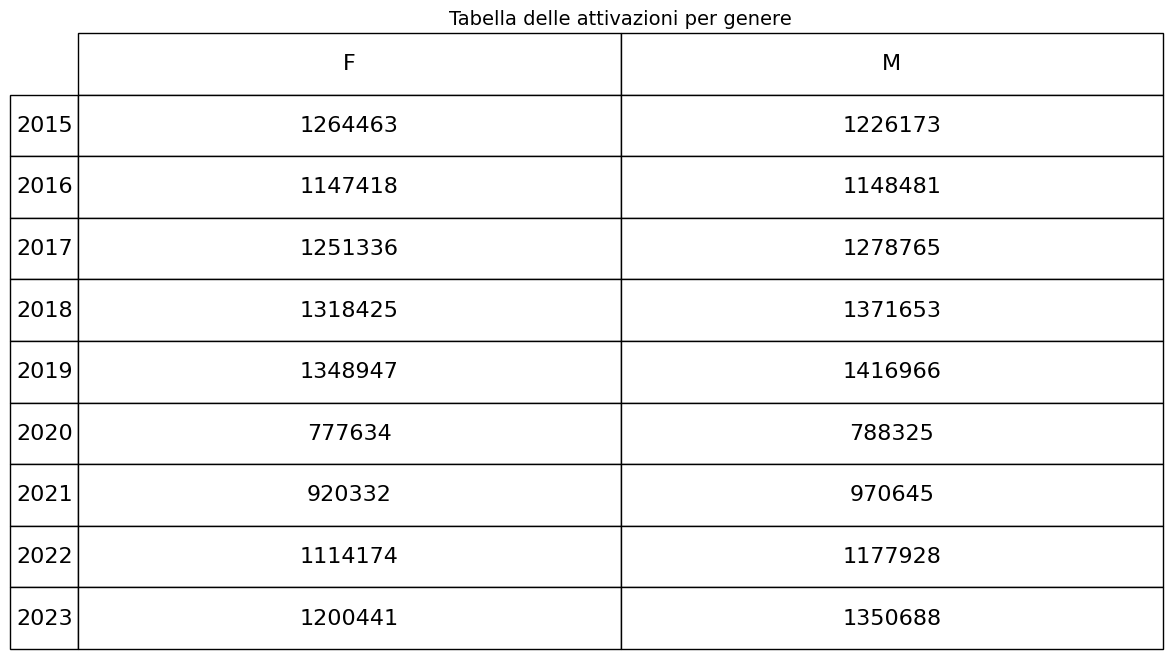

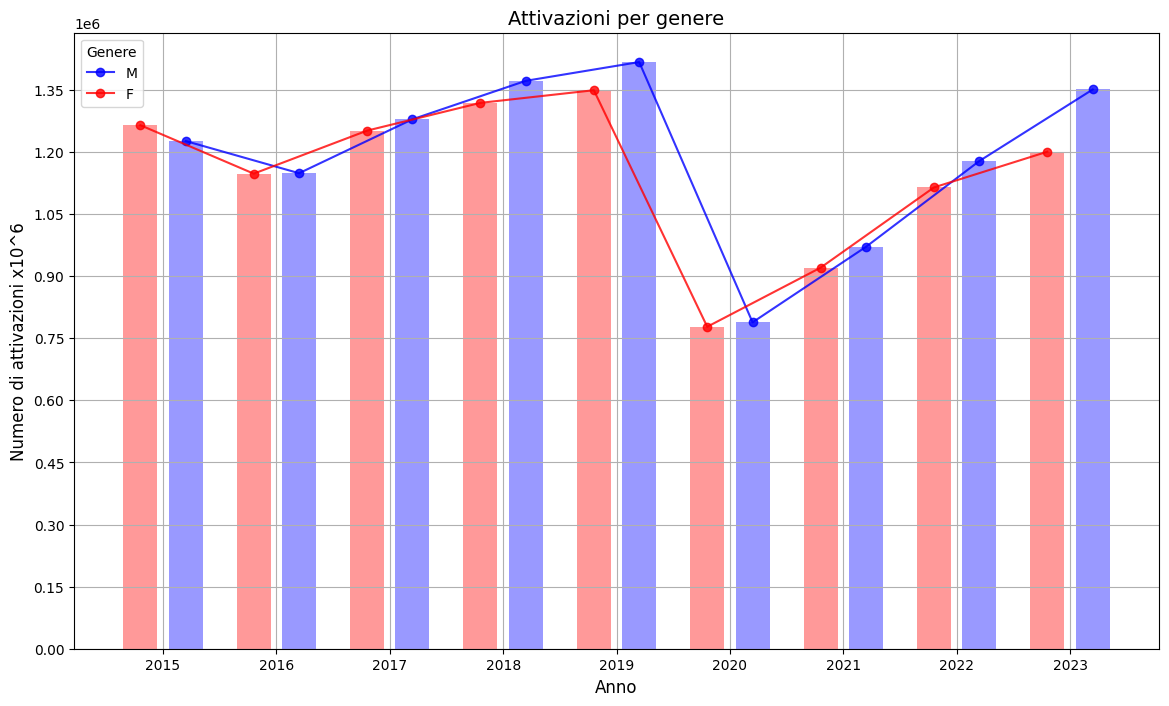

C:\Users\uervi\AppData\Local\Temp\ipykernel_8596\3180656574.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_generale_macroaree = df_attivazione_contratti.groupby(


interactive(children=(Dropdown(description='Macroarea:', options=('Centro', 'Mezzogiorno', 'Nord'), value='Cen…

interactive(children=(Dropdown(description='Macroarea:', options=('Centro', 'Mezzogiorno', 'Nord'), value='Cen…

C:\Users\uervi\AppData\Local\Temp\ipykernel_8596\3180656574.py:212: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_lazio = df_only_lazio.groupby(


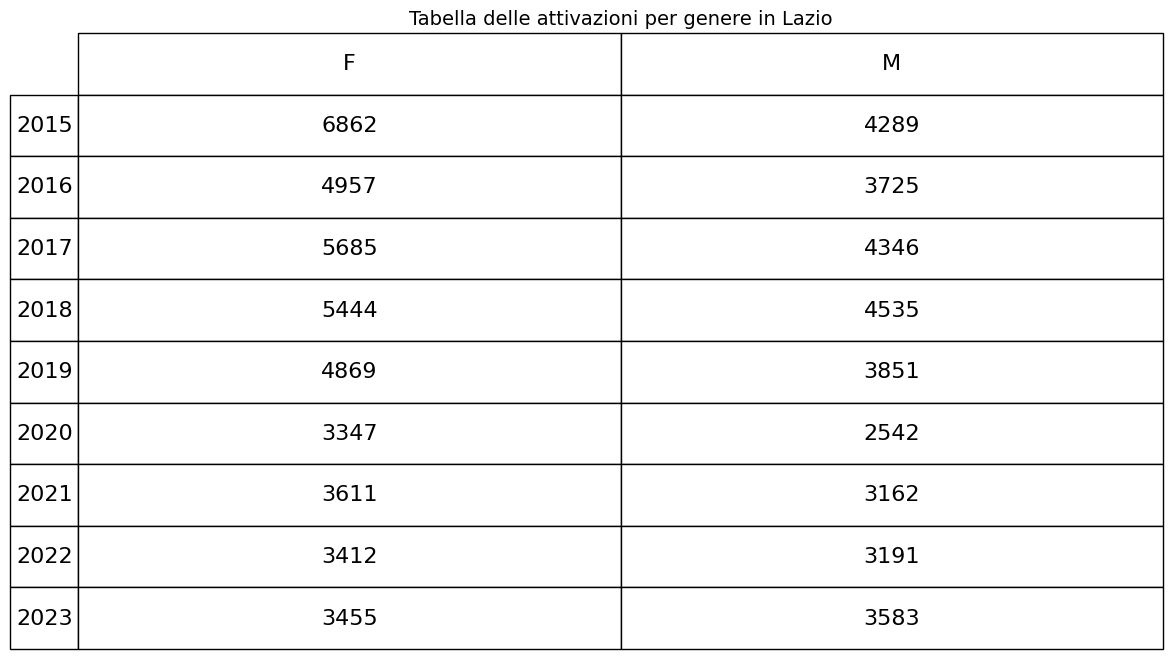

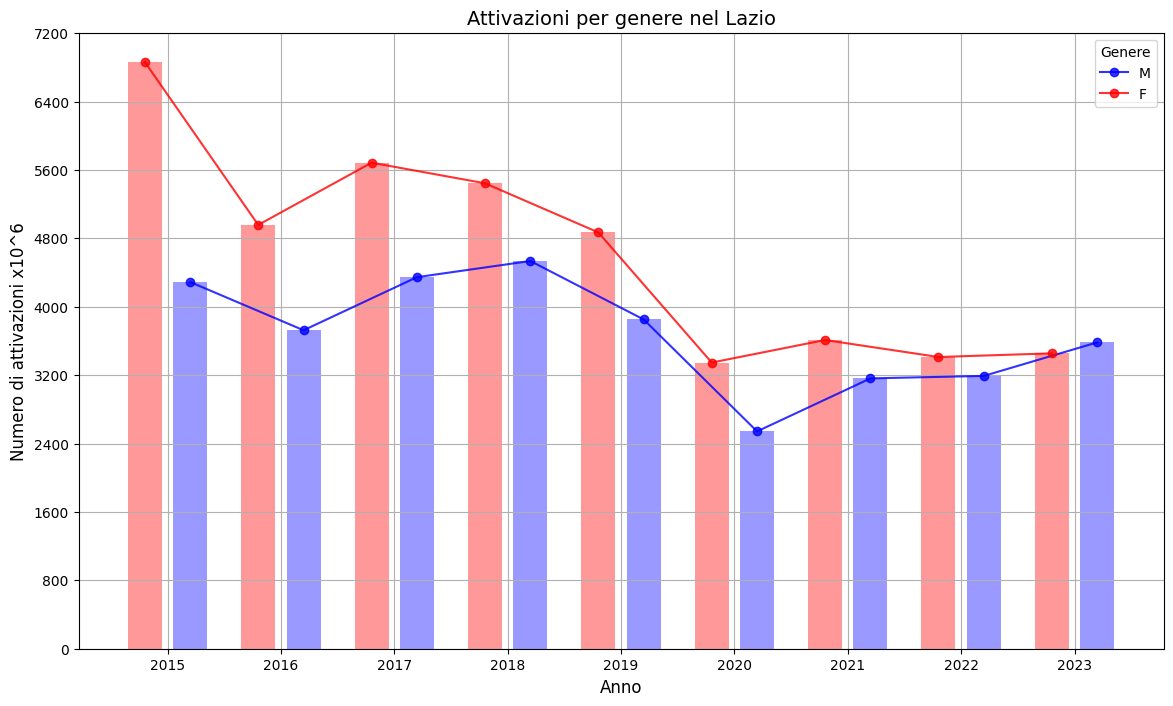

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import seaborn as sns
from ipywidgets import interact, widgets


df_attivazione_contratti = pd.read_excel(r"C:\Users\uervi\Desktop\analisi microdati\vm_df_attivazione_contratti_xlxs.xlsx")

#print(df_attivazione_contratti.columns)
#print(df_attivazione_contratti.head())  

df_attivazione_contratti['anno'] = df_attivazione_contratti['anno'].astype('category')
df_attivazione_contratti['mese'] = df_attivazione_contratti['mese'].astype('category')
df_attivazione_contratti['trimestre'] = df_attivazione_contratti['trimestre'].astype('category')
df_attivazione_contratti['ripartizione_territoriale'] = df_attivazione_contratti['ripartizione_territoriale'].astype('category')
df_attivazione_contratti['des_regione'] = df_attivazione_contratti['des_regione'].astype('category')
df_attivazione_contratti['codgenere'] = df_attivazione_contratti['codgenere'].astype('category')
df_attivazione_contratti['num_attivazioni'] = df_attivazione_contratti['num_attivazioni'].astype(int)
#print(df_attivazione_contratti['anno'].cat.categories)

####################################################

df_generale_nazionale = df_attivazione_contratti.groupby(['anno', 'codgenere'], as_index=False)['num_attivazioni'].sum()
#print(df_generale_nazionale.head())

#check_2015_F = df_attivazione_contratti[
#    (df_attivazione_contratti['anno'] == 2015) &
#    (df_attivazione_contratti['codgenere'] == 'F')
#]
#print(check_2015_F['num_attivazioni'].sum())

df_maschile = df_generale_nazionale[
    df_generale_nazionale['codgenere'] == 'M']
df_femminile = df_generale_nazionale[
    df_generale_nazionale['codgenere'] == 'F']

dati_tabella_nazionale = df_generale_nazionale.pivot(
    index='anno',
    columns='codgenere',
    values='num_attivazioni')

plt.figure(figsize=(14, 8))

tabella_nazionale = plt.table(
    cellText=dati_tabella_nazionale.values,
    rowLabels=dati_tabella_nazionale.index,
    colLabels=dati_tabella_nazionale.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1])

for key, cells in tabella_nazionale.get_celld().items():
    cells.set_fontsize(16)

plt.axis('off')
plt.title('Tabella delle attivazioni per genere', fontsize=14)

plt.show()

plt.figure(figsize=(14, 8))

x = np.arange(len(df_maschile['anno']))

offset = 0.2

plt.plot(
    x + offset,
    df_maschile['num_attivazioni'],
    label='M',
    color='blue',
    marker='o',
    alpha=0.8)
plt.plot(
    x - offset,
    df_femminile['num_attivazioni'],
    label='F',
    color='red',
    marker='o',
    alpha=0.8)

plt.bar(
    x + offset,
    df_maschile['num_attivazioni'],
    color='blue',
    alpha=0.4,
    width=0.3,)
plt.bar(x - offset, df_femminile['num_attivazioni'], color='red', alpha=0.4, width=0.3,)

plt.xticks(x, df_maschile['anno'])
plt.title('Attivazioni per genere', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di attivazioni x10^6', fontsize=12)
plt.grid(True)
plt.legend(title='Genere', fontsize=10)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

##############################################

df_generale_macroaree = df_attivazione_contratti.groupby(
    ['anno', 'ripartizione_territoriale', 'codgenere'],
    as_index=False
    )['num_attivazioni'].sum()
#print(df_generale_macroaree.head())

#check_2015_F = df_attivazione_contratti[
#    (df_attivazione_contratti['anno'] == 2015) &
#    (df_attivazione_contratti['codgenere'] == 'F') &
#    (df_attivazione_contratti['ripartizione_territoriale'] == 'Centro')
#]
#print(check_2015_F['num_attivazioni'].sum())

def mostra_tabella_macroarea(macroarea):
    dati_filtrati = df_generale_macroaree[
        df_generale_macroaree['ripartizione_territoriale'] == macroarea]
    
    d_tabella_macroarea = dati_filtrati.pivot(
        index='anno', 
        columns='codgenere', 
        values='num_attivazioni')
    
    plt.figure(figsize=(18, 12),)
    
    tabella_macroarea = plt.table(
        cellText=d_tabella_macroarea.values,
        rowLabels=d_tabella_macroarea.index,
        colLabels=d_tabella_macroarea.columns,
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1],
    )
    
    for key, cells in tabella_macroarea.get_celld().items():
        cells.set_fontsize(16)
        
    plt.axis('off')
    
    plt.title(f'Tabella delle attivazioni per la macroarea: {macroarea}', fontsize=24)
    
    plt.show()

macroarea_dropdown = widgets.Dropdown(
    options=df_generale_macroaree['ripartizione_territoriale'].unique(),
    description='Macroarea:',
    value=df_generale_macroaree['ripartizione_territoriale'].unique()[0]
)

interact(mostra_tabella_macroarea, macroarea=macroarea_dropdown)

def mostra_grafico_macroarea(macroarea):
    dati_filtrati = df_generale_macroaree[
        df_generale_macroaree['ripartizione_territoriale'] == macroarea]
    datif_maschile = dati_filtrati[
        dati_filtrati['codgenere'] == 'M']
    datif_femminile = dati_filtrati[
        dati_filtrati['codgenere'] == 'F']

    anni = dati_filtrati['anno'].unique()
    
    attivazioni_maschile = [
        datif_maschile[datif_maschile['anno'] == anno]
        ['num_attivazioni'].sum() 
        for anno in anni]
    attivazioni_femminile = [
        datif_femminile[datif_femminile['anno'] == anno]
        ['num_attivazioni'].sum() 
        for anno in anni]
    
    x = np.arange(len(anni))
    offset = 0.2
    
    plt.figure(figsize=(14, 8))
    
    plt.plot(
        x + offset,
        attivazioni_maschile,
        label='M',
        color='blue',
        marker='o',
        alpha=0.8)
    
    plt.plot(
        x - offset,
        attivazioni_femminile,
        label='F',
        color='red',
        marker='o',
        alpha=0.8)
    
    plt.bar(
        x + offset,
        attivazioni_maschile,
        color='blue',
        alpha=0.4,
        width=0.3,)
    
    plt.bar(
        x - offset,
        attivazioni_femminile,
        color='red',
        alpha=0.4,
        width=0.3,)
    
    plt.xticks(x, anni)
    plt.title(f'Attivazioni per genere nella macroarea: {macroarea}', fontsize=14)
    plt.xlabel('Anno', fontsize=12)
    plt.ylabel('Numero di attivazioni x10^6', fontsize=12)
    plt.grid(True)
    plt.legend(title='Genere', fontsize=10)
    plt.gca().yaxis.set_major_formatter(ScalarFormatter())
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()
    
interact(mostra_grafico_macroarea, macroarea=macroarea_dropdown)

#######################################################

df_only_lazio = df_attivazione_contratti[
    df_attivazione_contratti['des_regione'] == 'Lazio']
df_lazio = df_only_lazio.groupby(
    ['anno', 'codgenere'],
    as_index=False
    )['num_attivazioni'].sum()
df_lazio_maschile = df_lazio[df_lazio['codgenere'] == 'M']
df_lazio_femminile = df_lazio[df_lazio['codgenere'] == 'F']

dati_tabella_lazio = df_lazio.pivot(
    index='anno',
    columns='codgenere',
    values='num_attivazioni')

plt.figure(figsize=(14, 8))

tabella_lazio = plt.table(
    cellText=dati_tabella_lazio.values,
    rowLabels=dati_tabella_lazio.index,
    colLabels=dati_tabella_lazio.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1])

for key, cells in tabella_lazio.get_celld().items():
    cells.set_fontsize(16)  
    
plt.axis('off')
plt.title('Tabella delle attivazioni per genere in Lazio', fontsize=14)
plt.show()

plt.figure(figsize=(14, 8))
anni = df_lazio['anno'].unique()
attivazioni_maschili_lazio = [
    df_lazio_maschile[df_lazio_maschile['anno'] == anno]
    ['num_attivazioni'].sum() 
    for anno in anni]
attivazioni_femminili_lazio = [
    df_lazio_femminile[df_lazio_femminile['anno'] == anno]
    ['num_attivazioni'].sum() 
    for anno in anni]

x = np.arange(len(anni))
plt.plot(
    x + offset,
    attivazioni_maschili_lazio,
    label='M',
    color='blue',
    marker='o',
    alpha=0.8)

plt.plot(
    x - offset,
    attivazioni_femminili_lazio,
    label='F',
    color='red',
    marker='o',
    alpha=0.8)

plt.bar(
    x + offset,
    attivazioni_maschili_lazio,
    color='blue',
    alpha=0.4,
    width=0.3,)

plt.bar(
    x - offset,
    attivazioni_femminili_lazio,
    color='red',
    alpha=0.4,
    width=0.3,)

plt.xticks(x, anni)
plt.title('Attivazioni per genere nel Lazio', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di attivazioni x10^6', fontsize=12)
plt.grid(True)
plt.legend(title='Genere', fontsize=10)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))

x = np.arange(len(df_maschile['anno']))

offset = 0.2

plt.plot(
    x + offset, df_maschile['num_attivazioni'],
    label='M',
    color='blue',
    marker='o',
    alpha=0.8)
plt.plot(x - offset, df_femminile['num_attivazioni'], label='F', color='red', marker='o', alpha=0.8)

plt.bar(x + offset, df_maschile['num_attivazioni'], color='blue', alpha=0.4, width=0.3,)
plt.bar(x - offset, df_femminile['num_attivazioni'], color='red', alpha=0.4, width=0.3,)

plt.xticks(x, df_maschile['anno'])
plt.title('Attivazioni per genere', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di attivazioni x10^6', fontsize=12)
plt.grid(True)
plt.legend(title='Genere', fontsize=10)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()